<a href="https://colab.research.google.com/github/zmohaghegh/House-Price-Prediction-Regression/blob/main/House_Price_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Cross-Validation R2 Scores: [0.54866323 0.46820691 0.55078434 0.53698703 0.66051406]
✅ Average R2 Score: 0.5530


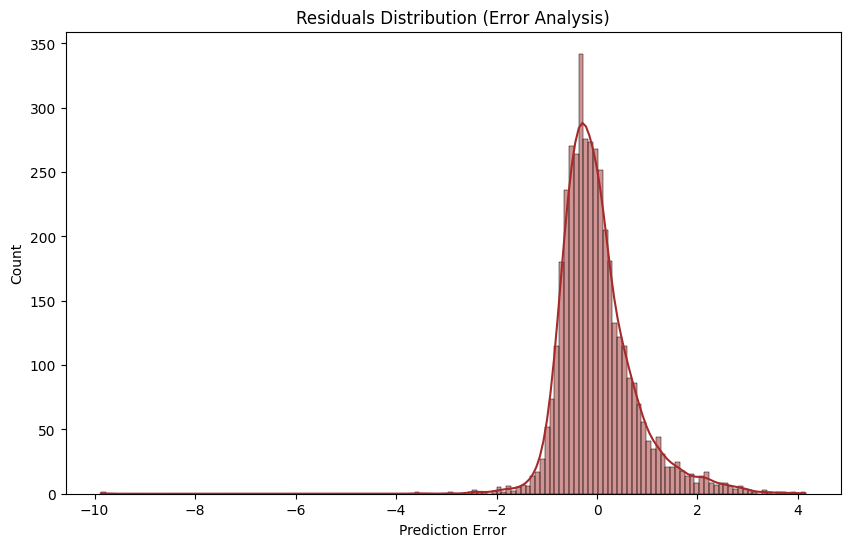

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Load Data
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target

# 2. Preprocessing
scaler = StandardScaler()
X = df.drop('Price', axis=1)
y = df['Price']
X_scaled = scaler.fit_transform(X)

# 3. Model
model = LinearRegression()

# 4. CROSS-VALIDATION (اثبات اینکه مدل شانسی نیست)
# مدل را 5 بار روی بخش‌های مختلف داده تست می‌کنیم
scores = cross_val_score(model, X_scaled, y, cv=5)
print(f"📊 Cross-Validation R2 Scores: {scores}")
print(f"✅ Average R2 Score: {np.mean(scores):.4f}")

# 5. Final Training & Prediction
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 6. Residual Analysis (تحلیل باقی‌مانده‌ها برای اثبات علمی بودن)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='brown')
plt.title('Residuals Distribution (Error Analysis)')
plt.xlabel('Prediction Error')
plt.show()